# Intro to Data Scince


# 2. Regular Expressions 

Write regular expressions for the following examples that matches the data of the given format and any other reasonable variations thereof. E.g., your regex shouldn't be specific to one URL or one phone number, but should work for all examples of the same format.

**Task 2.1.** Writes a regular expression that extracts the urls out of this string, but only the URLs.

In [185]:
text = r"""To learn about pros/cons of data science, go to http://datascience.net.\
Alternatively, go to datascience.net/2020/"""

In [186]:
import re

raw_string = r"{}".format(text)
result = re.findall(r"[\w+://]*\w+\.\w+[\/]*\w+?[\w\?=#]*", raw_string) 
print(result)

['http://datascience.net', 'datascience.net/2020']


**Task 2.2.** Write a regular expression that extracts all phone numbers and fax numbers from this text: 

In [187]:
text = """You can reach me at 054-434-4321, or my office at (03) 502 9571 or (050) 223 957.\ 
Send me a fax at 03 502 7422. We finally made the sale for all 977 giraffes.\
They wanted 225 957 dollars for it."""

In [188]:
# text2= text.replace('-',' ').replace(' ','').replace('(','').replace(')','').replace('\\','')
# print(text2) #cleaning all disturbence (while not changing original text)
# print(re.findall(r'\d{8,10}',text2)) #collect all number between 8-10 digits(regular expression)
#this was the easy solution i didnt use eventually
text2 = text.replace('(','').replace(')','')
result3 = re.findall(r"\(?\d{2,3}\)?[\-\.\s]\d{3}[-.\s]\d{3,4}",text2)
print(result3)


['054-434-4321', '03 502 9571', '050 223 957', '03 502 7422']


**Task 2.3.** Write a regular expression that extracts all opening html tags from this, including `<br />`.

In [189]:
html = "This is <b>important</b> and <u>very</u><i>timely</i><br />. Was this <span> what you meant?</span>"

In [190]:
print(re.findall('<[^/].*?>', html))
#if the first letter in tag conatain / its mean closing tag, so i removed it
#the / in br is after the br so it dosent get removed

['<b>', '<u>', '<i>', '<br />', '<span>']


**Task 2.4.** Write a regular expression that extracts all the names of people from the following text. 

In [191]:
text = """Arnold Schwarzenegger was born in Austria. He and Sylvester Stalone used to run a restaurant\
with J. Edgar Hoover."""

In [192]:
print(re.findall(r"(?:[A-Z][a-z]*\.\s*)?[A-Z][a-z]+?\s+?[A-Z][a-z]+", text))
#the first parentheses is for the title(J.) with '?'
#after that there are two for names(first+last) with 's+' space between

['Arnold Schwarzenegger', 'Sylvester Stalone', 'J. Edgar Hoover']


**Task 2.5.** Write a regular expression that extracts the text out of all html elements of class important.

In [193]:
text = """Lorem ipsum dolor <b>sit</b> amet, <b class="important">consectetur adipiscing</b> elit,\ 
sed do eiusmod <span id="note">tempor incididunt ut</span> <div>labore <strong class="important">\
et dolore magna</strong> aliqua.</div> Ut enim ad minim veniam, quis nostrud exercitation ullamco."""

In [194]:
#that's for this example(didnt use eventually) 
# text2 = re.findall('b class="important">(.*|/n*)<\/b>', text)
# # text2 += re.findall('<strong class="important">(.*|/n*)</strong>',text)
# # print(text2)

val = re.findall(r'class="important">([a-z\ ]+)',text)
print(val)

['consectetur adipiscing', 'et dolore magna']


## 3. Text processing: Comparing Netanyahu's and Gantz's Facebook Posts


Download the `election_posts.xlsx` data set from the course moodle. The file has more than 350 posts from the two main candidates in the previous elections (Gantz and Netanyahu). You are required to write an algorithm to analyze the posts and look for some insights and differences between the candidates.

The general steps we follow are:
1. Load the data set (you can use read_excel or other pandas functions)   
+ Do preprocessing: (i.e punctuation removal, removal of english phrases, tokenization)
+ Analyze word frequencies per candidate
+ Find main differences between them (try to ignore function words)
+ Try to look for other features (i.e text len, use of emoji's, etc), and look for differences
+ Print a Wordcloud for each candidate with main words
+ Evaluate the results, and write your insights



**Task 3.1.** Load the dataset.

1. Print the exact number of posts per candidate in the corpus.


In [199]:
import pandas as pd
count = 0
df = pd.DataFrame()
df = pd.read_excel('election_posts.xlsx')  
bibi = (df['PageName'] == 'Benjamin Netanyahu').sum()
print("Bibi's post:", bibi)
print("Gantz's post:", df.shape[0] - bibi)
#df.shape[0] - number of rows


Bibi's post: 186
Gantz's post: 168


### Task 3.2 Preprocessing

Preprocess the text data. In particular remove punctuations (be careful with "), remove english words, and tokenize the posts into token vectors (one vector for each post)



In [196]:
from nltk.probability import FreqDist
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize,RegexpTokenizer
import numpy as np
from nltk import FreqDist # Takes a bunch of tokens and returns the frequencies of all unique cases.
from nltk.corpus import stopwords
df2 = pd.DataFrame() #new data frame where i keep the cleand text
df2=df
df2['Data'] = df2['Data'].str.replace('"', '') #remove all double quotes 
HebStopWords = ['את', 'אני','את','אתה','אנחנו','אתן','אתם','הם','הן','היא','הוא','שלי','שלו','שלך','שלה','שלנו','שלכם','שלכן',
'שלהם','שלהן','לי','לו','לה','לנו','לכם','לכן','להם','להן','אותה','אותו','זה','זאת','אלה','אלו','תחת','מתחת','מעל','בין','עם',
'עד','נגר','על','אל','מול','של','אצל','כמו','אחר','אותו','בלי','לפני','אחרי','מאחורי','עלי','עליו','עליה','עליך','עלינו','עליכם','לעיכן','עליהם',
'עליהן','כל','כולם','כולן','כך','ככה','כזה','זה','זות','אותי','אותה','אותם','אותך','אותו','אותן','אותנו','ואת','את','אתכם','אתכן','איתי',
'איתו','איתך','איתה','איתם','איתן','איתנו','איתכם','איתכן','יהיה','תהיה','היתי','היתה','היה','להיות','עצמי','עצמו','עצמה','עצמם','עצמן',
'עצמנו','עצמהם','עצמהן','מי','מה','איפה','היכן','במקום שבו','אם','לאן','למקום שבו','מקום בו','איזה','מהיכן','איך','כיצד','באיזו מידה',
'מתי','בשעה ש','כאשר','כש','למרות','לפני','אחרי','מאיזו סיבה','הסיבה שבגללה','למה','מדוע','לאיזו תכלית','כי','יש','אין','אך','מנין','מאין','מאיפה','יכל',
'יכלה','יכלו','יכול','יכולה','יכולים','יכולות','יוכלו','יוכל','מסוגל','לא','רק','אולי','אין','לאו','אי','כלל','נגד','אם','עם','אל','אלה','אלו','אף','על','מעל','מתחת','מצד','בשביל','לבין','באמצע','בתוך','דרך','מבעד','באמצעות',
'למעלה','למטה','מחוץ','מן','לעבר','מכאן','כאן','הנה','הרי','פה','שם','אך','ברם','שוב','אבל','מבלי','בלי','מלבד','רק','בגלל','מכיוון','עד','אשר','ואילו','למרות','אס',
'כמו','כפי','אז','אחרי','כן','לכן','לפיכך','מאד','עז','מעט','מעטים','במידה','שוב','יותר','מדי',
                'גם','כן','נו','אחר','אחרת','אחרים','אחרות','אשר','או']

pat = r'\b(?:{})\b'.format('|'.join(HebStopWords)) #(word1|word2)

df2['Data'] = df['Data'].str.replace(pat, '') #removing all hebrew stop words to get more accurate


tokenizer = RegexpTokenizer('[0-9\:\"\u0590-\u05ff]+[\w+(?:"\w+)+]') #using the Hebrew Unicode
#only hebrew+numbers+':' can be in the df, cleans also emojis
#df2['Data'] = df2['Data'].apply(tokenizer.tokenize)
df2['Data'] = df2['Data'].apply(tokenizer.tokenize)

#print(df2.tail(186).to_string())
category=1
Vector = [([item.lower() for item in doc if item.isalpha()], category) for doc in df2['Data']]

### Task 3.3 Analyze word frequencies per candidate

Analyze the total word frequencies, and frequencies of words per candidate. Once you have the absolute frequency of each word, analyze the frequencies also from a relative perspective. I.e if one candidate A has a total of 1000 tokens, and candidate B 1200 tokens, and the word "בחירות" appears 25 times in each candidate's posts. The relative frequency of that word for candidate A is 2.5% (25 / 1000) and for candidate B 2.08% (25 / 1200). 


The top 25 words used by both of the leaders: 
ישראל 259
נתניהו 167
ראש 88
הממשלה 85
ממשלה 79
כדי 78
ממשלת 76
לבן 60
גנץ 53
כחול 53
היום 51
המדינה 50
אזרחי 50
הכל 49
הליכוד 45
מדינת 45
לכל 44
בכל 43
ולא 42
בחירות 40
הבחירות 39
שבת 38
שלום 38
עוד 36
שלא 36


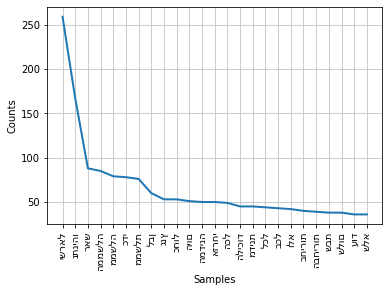

Total word frequencies(without numbers or stopwords): 8479
Number of words that Benjamin Netanyahu used:  3386  While Benny Gantz used:  5093 


Top words used by Benjamin Netanyahu:
         Frequency
Word              
ישראל           59
גנץ             50
הממשלה          47
נתניהו          44
ראש             43
...            ...
איחוד            1
מסיתים           1
ומרגלים          1
לגיטימי          1
האבסורד          1

[3386 rows x 1 columns]


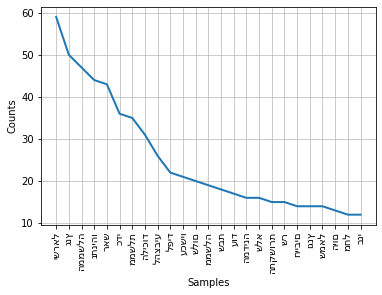

Top words used by Benny Gantz:
        Frequency
Word             
ישראל         200
נתניהו        123
ממשלה          60
לבן            53
כחול           50
...           ...
תתנצל           1
שהכתם           1
ילווה           1
חייך            1
תתבייש          1

[5093 rows x 1 columns]


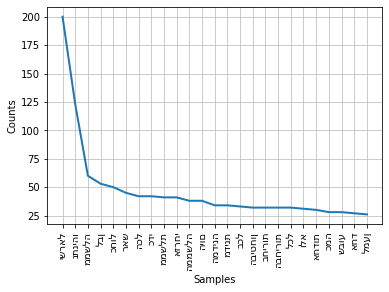

The relative frequency (Precentage) of the most common words for candidate Benjamin Netanyahu: 
         Frequency
Word              
ישראל     1.742469
גנץ       1.476669
הממשלה    1.388069
נתניהו    1.299468
ראש       1.269935
...            ...
איחוד     0.029533
מסיתים    0.029533
ומרגלים   0.029533
לגיטימי   0.029533
האבסורד   0.029533

[3386 rows x 1 columns]
The relative frequency (Precentage) of the most common words for for candidate Benny Gantz: 
        Frequency
Word             
ישראל    3.926959
נתניהו   2.415080
ממשלה    1.178088
לבן      1.040644
כחול     0.981740
...           ...
תתנצל    0.019635
שהכתם    0.019635
ילווה    0.019635
חייך     0.019635
תתבייש   0.019635

[5093 rows x 1 columns]


In [203]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
from collections import Counter
from nltk import FreqDist # Takes a bunch of tokens and returns the frequencies of all unique cases.
wordTokens = FreqDist([item for doc in df2['Data'] for item in doc if item.isalpha()])
print('The top 25 words used by both of the leaders: ')

j=0
for i,k in sorted(wordTokens.items(),key=lambda x:x[1],reverse=True):
    if(j>24):
        break
    j+=1
    print(i,k)

fdist1 = FreqDist(wordTokens)
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist1.plot(25,cumulative=False)
plt.show()
#manipulating the data frame because its ordered. (first BB then gantz)
wordsbb = FreqDist([item for doc in df2['Data'][0:185] for item in doc if item.isalpha()])
wordsgantz = FreqDist([item for doc in df2['Data'][185:356] for item in doc if item.isalpha()])

bbcount = len(wordsbb)
gantzcount = len(wordsgantz)

print("Total word frequencies(without numbers or stopwords):", bbcount+gantzcount)
print('Number of words that Benjamin Netanyahu used: ',bbcount,' While Benny Gantz used: ',gantzcount,'\n\n')

print('Top words used by Benjamin Netanyahu:')
rslt = pd.DataFrame(Counter(wordsbb).most_common(bbcount),columns=['Word', 'Frequency']).set_index('Word')
print(rslt)
#plot:
fdist2 = FreqDist(wordsbb)
fdist2.plot(25,cumulative=False)
plt.show()

#-------------

print('Top words used by Benny Gantz:')
rslt2 = pd.DataFrame(Counter(wordsgantz).most_common(gantzcount),columns=['Word', 'Frequency']).set_index('Word')
print(rslt2)

#plot:
fdist3 = FreqDist(wordsgantz)
fdist3.plot(25,cumulative=False)
plt.show()
#------------

print('The relative frequency (Precentage) of the most common words for candidate Benjamin Netanyahu: ')
print((rslt*100)/bbcount)


print('The relative frequency (Precentage) of the most common words for for candidate Benny Gantz: ')
print((rslt2*100)/gantzcount)



**Interpretation:** TODO

### Task 3.4 Find the main differences

Based on previous stats, find the main differences between the language and posts that each candidate uses

Benjamin Netanyahu using 21 emojies:  ❤❤🇮🇱🇮🇱🇺🇸🇮🇱❤🇮🇱🇮🇱🇮🇱🇮🇱🇮🇱🇮🇱♥🇮🇱♥🇮🇱🙏🙏🇮🇱♥♥
While Benny Gantz is not using any emojies 
Most common bigrams of Benjamin Netanyahu:

('להצביע', 'מחל') 10
('שבת', 'שלום') 18
('ראש', 'הממשלה') 31
('מדינת', 'ישראל') 9
('ממשלת', 'ימין') 9
('בני', 'גנץ') 9
('אזרחי', 'ישראל') 9
('הממשלה', 'נתניהו') 13
('ממשלת', 'שמאל') 14
('לפיד', 'וגנץ') 9
Most common bigrams of Beny Gantz:

('ישראל', 'הכל') 13
('כחול', 'לבן') 50
('ממני', 'אליכם') 15
('ראש', 'הממשלה') 14
('ראש', 'ממשלה') 27
('אזרחי', 'ישראל') 36
('מדינת', 'ישראל') 34
('שבת', 'שלום') 17
('שלום', 'לכולם') 12
('ממשלת', 'אחדות') 21

Strings counter:
(line---counter) 
 0       11
1      139
2        6
3        8
4      209
      ... 
349    620
350    408
351    218
352    120
353    177
Name: Data, Length: 354, dtype: int64

String counter (blue-Netanyahu, orange-Gantz):

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
Total number of strings Netanyahu used is:  48381  and Gantz used:  8210

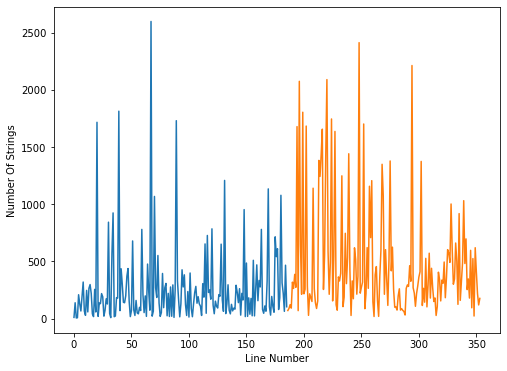

In [204]:
#pip install emoji
import emoji
df5=df
s1=df5.Data.head(186).to_string()
s2=df5.Data.tail(168).to_string()

def extract_emojis(str):
      return ''.join(c for c in str if c in emoji.UNICODE_EMOJI)
    
print('Benjamin Netanyahu using 21 emojies: ',extract_emojis(s1))
print('While Benny Gantz is not using any emojies', extract_emojis(s2))
#-------------
# Function to convert from list to string  
def listToString(s):  
    str1 = " " 
    return (str1.join(s)) 
#-------------------
print('Most common bigrams of Benjamin Netanyahu:\n')
tok= [item for doc in df2['Data'].head(186) for item in doc if item.isalpha()]
str5= listToString(tok)
nltk_tokens = nltk.word_tokenize(str5) 
bgs = nltk.bigrams(nltk_tokens )
#compute frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(bgs)
for k,v in fdist.items():
    if (v > 7):
        print(k,v)
#------------------
print('Most common bigrams of Beny Gantz:\n')
tok= [item for doc in df2['Data'].tail(168) for item in doc if item.isalpha()]
str6= listToString(tok)
nltk_tokens2 = nltk.word_tokenize(str6) 
bgs2 = nltk.bigrams(nltk_tokens2)
#compute frequency distribution for all the bigrams in the text
fdist2 = nltk.FreqDist(bgs2)

for k,v in fdist2.items():
    if (v > 11):
        print(k,v)
#-----------------
df4['x'] = df['Data'].str.len()
print('\nStrings counter:\n(line---counter) \n',df4['x'])
print('\nString counter (blue-Netanyahu, orange-Gantz):\n')
df4['x'] =df['Data'].head(186).str.len()

ax = df4['x'].plot(figsize = (8,6))
ax.set_xlabel("Line Number")
ax.set_ylabel("Number Of Strings")
print(ax)

df4['x'] =df['Data'].tail(168).str.len()
print(df4['x'].plot(figsize = (8,6)))
gantzsum =df['Data'].tail(168).str.len().sum()
bbsum = df['Data'].head(186).str.len().sum()
print('Total number of strings Netanyahu used is: ', bbsum,' and Gantz used: ',gantzsum,'\n')

**Interpretation:** TODO

### Task 3.5 Find additional interesting features

Try to look for other interesting features that can show differences between the candidates (features such as post length, emoji's, use of punctuation or any other ideas you have)

First you try, enter a word(Hebrew,not a stopword) to check if it is in the text: 
בני
Length of all data is:  8728  words
Dispersion plot:(common words in corpus:) 



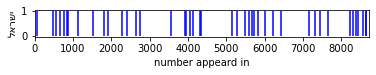

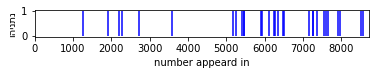

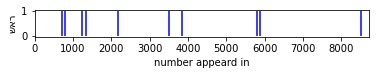

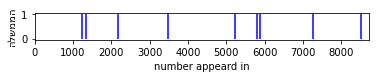

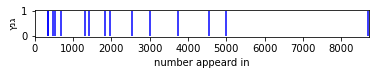

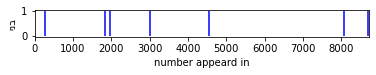

In [206]:
import matplotlib.pyplot as plt
import re
def printDispresionPlot(str1):
    text=df2['Data'].to_string()
    words = re.split("\W", text.lower()) # split into words
    words = [w for w in words] # remove empty elements
    WORD = str1
    x=list()
    for i in range(0,len(words)): # for every word in text
        if words[i] == WORD: 
            x.append(i) # if so, append its position to variable x which is the appearences in text

    fig, ax = plt.subplots()
    ax.vlines(x, 0, 1, edgecolor="blue") # <-- ANSWER
    ax.set_xlim([0, len(words)]) # set the lower and upper limits of graph
    ax.set_xlabel('number appeard in')
    ax.set_xticks([0],minor=True) # turn off: ax.set_xticks([])
    ax.set_ylabel(WORD[::-1]) #in hebrew it shows reversed
    fig.set_figheight(0.5) 
    #------------------
printDispresionPlot('ישראל')
printDispresionPlot('נתניהו')
printDispresionPlot('ראש')
printDispresionPlot('הממשלה')
printDispresionPlot('גנץ')

text=df2['Data'].to_string()
#print(text)
words = re.split("\W", text.lower()) # split into words
words = [w for w in words] # remove empty elements
st2 = input("First you try, enter a word(Hebrew,not a stopword) to check if it is in the text: \n")
print('Length of all data is: ',len(words),' words')
printDispresionPlot(st2)
print('Dispersion plot:(common words in corpus:) \n')
#-------------------------


**Interpretation:** TODO

### Task 3.6 Wordclouds

Print a wordcloud for each candidate

Netanyahu wordcloud: 



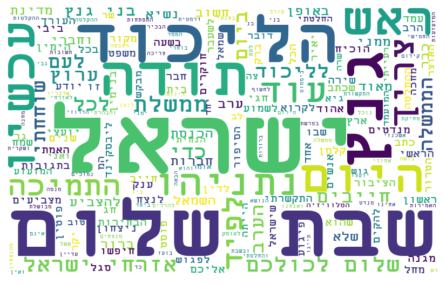

In [209]:
import matplotlib.pyplot as plt
from wordcloud.wordcloud import WordCloud
# install: pip install python-bidi <<< this is the only way i succseed wordcloud in Hebrew
from bidi.algorithm import get_display
print("Netanyahu wordcloud: \n")
#df2.Data.head(186) bb
#df2.Data.tail(168)  gantz

textb = df2.Data.head(186).to_string()
bidi_text = get_display(str(textb))
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\courbd.ttf',
    width = 800,height = 500,background_color = 'white',max_font_size=200).generate(bidi_text)
plt.imshow(wordcloud, interpolation = 'bilinear')

plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

Gantz wordcloud: 



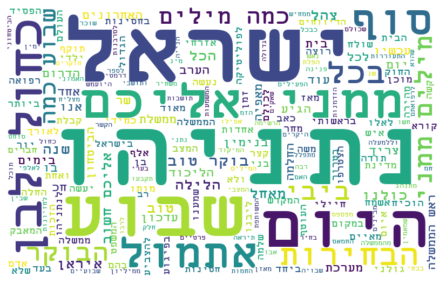

In [210]:
textg = df2.Data.tail(168).to_string()
bidi_text = get_display(str(textg))
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\courbd.ttf',
    width = 800,height = 500,background_color = 'white',max_font_size=200).generate(bidi_text)
plt.imshow(wordcloud, interpolation = 'bilinear')
print("Gantz wordcloud: \n")

plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### Task 3.7 Result evaluation and insights

Look at the results and write your insights

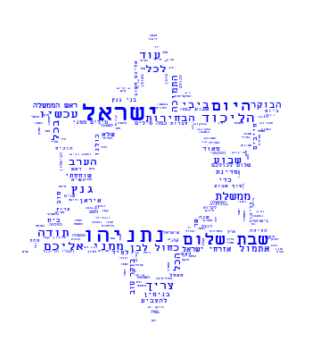

In [215]:
from PIL import Image    # to import the image
# Load the image (http://python-graph-gallery.com/wp-content/uploads/wave.jpg)

flag_mask = np.array(Image.open( "star.png"))
bidi_text = get_display(str(textg+textb)) #bb and gantz
wordcloud = WordCloud(mask=flag_mask,font_path = 'C:\Windows\Fonts\courbd.ttf',
   background_color = 'white',color_func=lambda *args, **kwargs:(0,0,255)).generate(bidi_text)#(0,0,255) Blue color
# Make the figure
plt.figure(figsize = (9,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

My interpretation from this corpus, its that even though Gantz had fewer posts(168, Netanyahu 186) it conatains a lot more words in them (1.697 more) almost twice as many words then Netanyahu,
Netanyahu posts was shorter and contain 21 emojies (Gantz had 0)
They both main words was Israel, goverment, names of both parties(Likud,Kahol-lavan), and their first names.